In [1828]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings # To remove any random warnings
warnings.filterwarnings(action = 'ignore') # Commands which helps to remove the warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1829]:
### Importing the bike data
bike_data = pd.read_csv("C:/Users/prince.maini/day.csv")

In [1830]:
# Problem description
# We are required to predict the count and dependency of independent variable on count.
# Clearly this is a regression problem as we need to predict the numerical variable.
# This is a multiple regression problem as we want to determine the relationship the dependent varible ( count ) has on other independent variable.
# Goal: 
# 1. Which variables are significant in predicting the demand for shared bikes.
# 2. How well those variables describe the bike demands.

# Step : 1 Data understanding

In [1831]:

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1832]:
### Checking the total rows and columns before data cleaning
bike_data.shape

(730, 16)

In [1833]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1834]:
#Know the type of data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1835]:
#data sanity check
#From below we can see that there are no missing values
100*bike_data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

# Step 2 : Data cleaning  

In [1836]:

# Dropping row 'instant' as it is the record index which will not help in doing any analysis
# Dropping row 'dteday' as there are large number of unique values and it will not help us in further analysis. Further we have all the relevant information from this column in the form of yr,mnth.
# Dropping casual and registered as there is a direct linear relationship between count and these variables.

drop_cols =['instant','dteday','casual','registered']
bike_data.drop(drop_cols, axis = 1, inplace=True)


In [1837]:
#checking the final columns and rows
bike_data.shape

(730, 12)

In [1838]:
#categorizing variables
cont_variables=['temp','atemp','hum','windspeed','cnt']
cat_variables = ['weathersit','workingday','weekday','holiday','mnth','yr','season']
all_var=['temp','atemp','hum','windspeed','weathersit','workingday','weekday','holiday','mnth','yr','season']


# Step 3: Visualising the data ( pairplot - numerical , boxplots - categorical , heatmap - numerical )

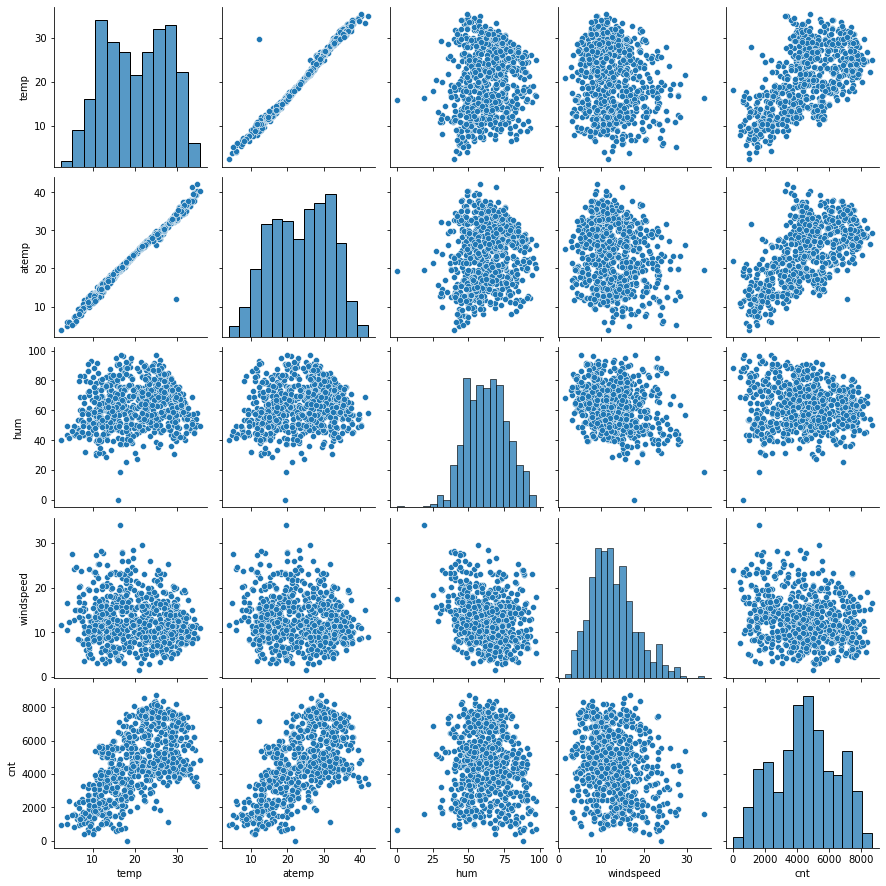

In [1839]:

#sns.pairplot(bike_data)
sns.pairplot(data=bike_data,vars=cont_variables)
plt.show()


In [1840]:
# From the above plots below can be concluded
# temp and cnt have a linear relationship
# temp and atemp have linear relationship

weathersit


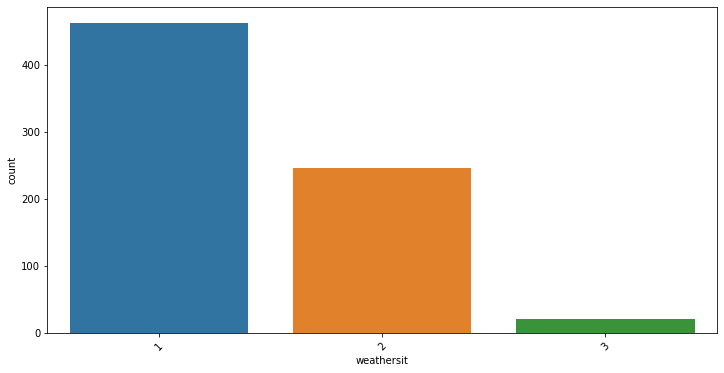

workingday


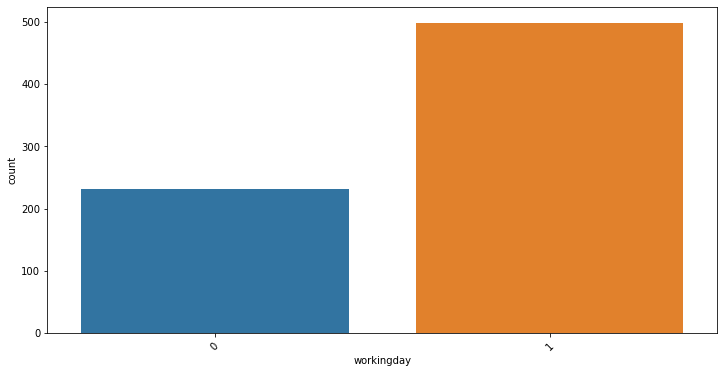

weekday


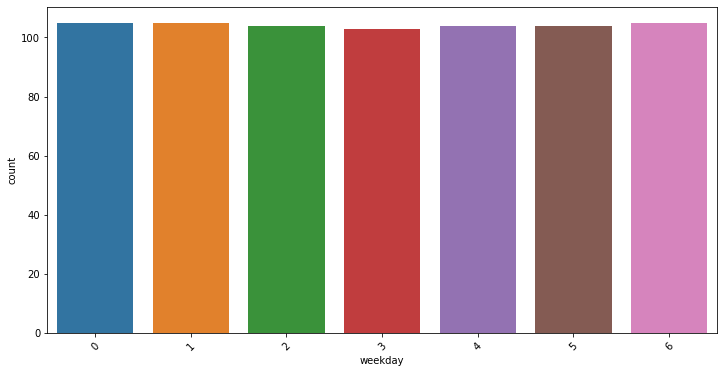

holiday


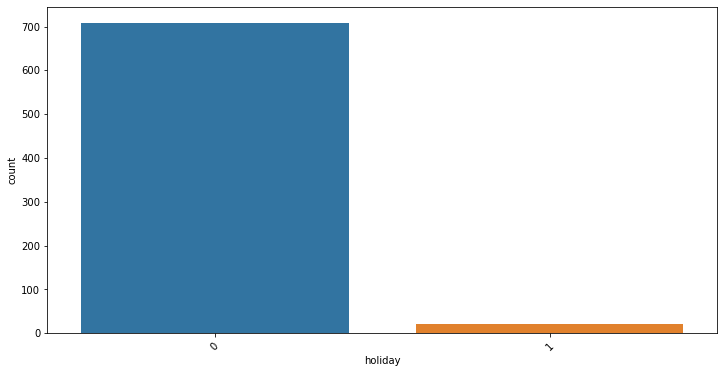

mnth


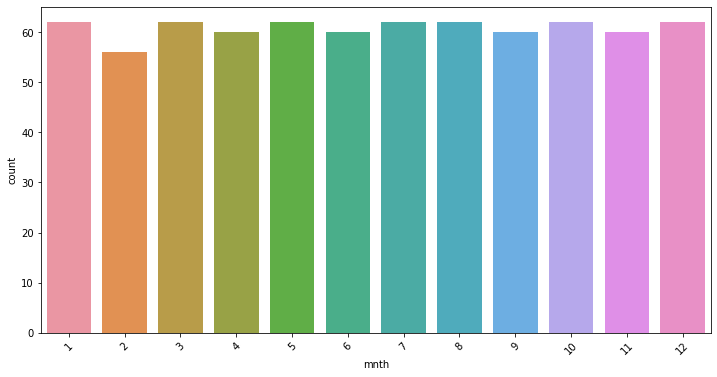

yr


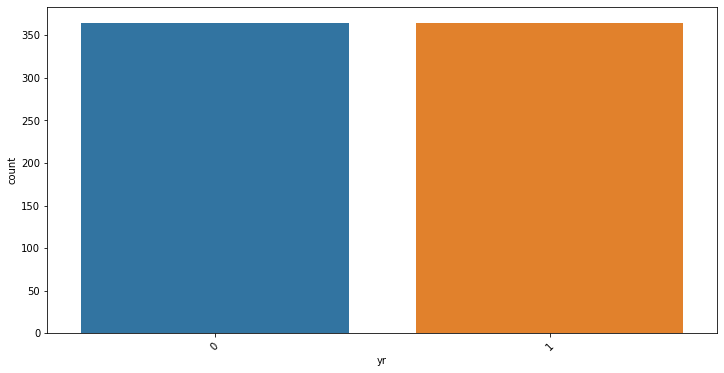

season


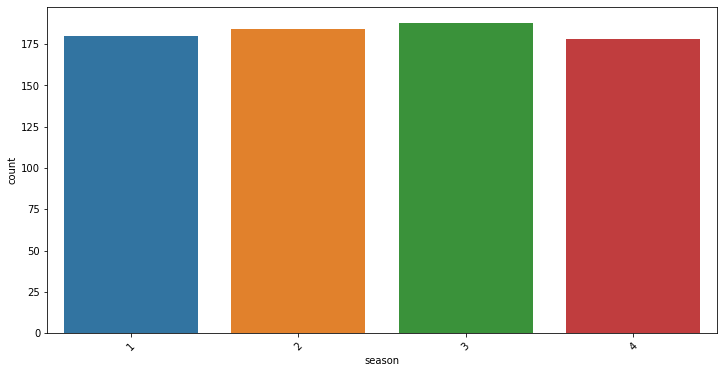

In [1841]:
#Exploratory data analysis

# Univariate Analysis 
# Categorical variables - Countplot is used

for i in cat_variables:
    print (i)
    plt.figure(figsize = (12,6))
    sns.countplot(bike_data[i])
    plt.xticks(rotation = 45)
    plt.show()

In [1842]:
# From count plots it can be seen that 
# 1.Count is more for weathersit - 1 (Clear, Few clouds, Partly cloudy, Partly cloudy)
# 2.Count is more for workingday
# 3.Count is more when it is not a holiday


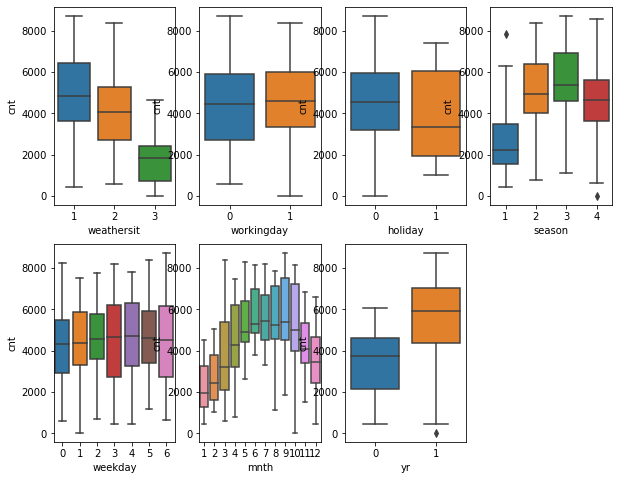

In [1843]:
#Boxplots
#To find out the relationship between target variable and categorical variable
plt.figure(figsize=(10,8))
plt.subplot(2,4,1)
sns.boxplot(x='weathersit',y='cnt',data=bike_data)

plt.subplot(2,4,2)
sns.boxplot(x='workingday',y='cnt',data=bike_data)

plt.subplot(2,4,3)
sns.boxplot(x='holiday',y='cnt',data=bike_data)

plt.subplot(2,4,4)
sns.boxplot(x='season',y='cnt',data=bike_data)

plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=bike_data)

plt.subplot(2,4,6)
sns.boxplot(x='mnth',y='cnt',data=bike_data)

plt.subplot(2,4,7)
sns.boxplot(x='yr',y='cnt',data=bike_data)

plt.show()

In [1844]:
# From above, additionally it can concluded that
# Count is relatively higher for 2019 compared to 2018

# Step 4 : Data preparation

In [1845]:
# Dummy encoding for all categorical variables
weathersit_encoded=pd.get_dummies(bike_data['weathersit'],prefix='weathersit',drop_first=True)
season_encoded=pd.get_dummies(bike_data['season'],prefix='season',drop_first=True)
yr_encoded=pd.get_dummies(bike_data['yr'],prefix='yr',drop_first=True)
mnth_encoded=pd.get_dummies(bike_data['mnth'],prefix='mnth',drop_first=True)
holiday_encoded=pd.get_dummies(bike_data['holiday'],prefix='holiday',drop_first=True)
weekday_encoded=pd.get_dummies(bike_data['weekday'],prefix='weekday',drop_first=True)
workingday_encoded=pd.get_dummies(bike_data['workingday'],prefix='workingday',drop_first=True)

In [1846]:
# Concatinating the above columns to original data set
bike_data= pd.concat([bike_data,weathersit_encoded,season_encoded,yr_encoded,mnth_encoded,holiday_encoded,weekday_encoded,workingday_encoded],axis=1)

In [1847]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    int64  
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   weathersit    730 non-null    int64  
 7   temp          730 non-null    float64
 8   atemp         730 non-null    float64
 9   hum           730 non-null    float64
 10  windspeed     730 non-null    float64
 11  cnt           730 non-null    int64  
 12  weathersit_2  730 non-null    uint8  
 13  weathersit_3  730 non-null    uint8  
 14  season_2      730 non-null    uint8  
 15  season_3      730 non-null    uint8  
 16  season_4      730 non-null    uint8  
 17  yr_1          730 non-null    uint8  
 18  mnth_2        730 non-null    

In [1848]:
bike_data.drop(cat_variables,axis=1,inplace=True)


In [1849]:
bike_data.head()

,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4,...,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# Step 5: Splitting the dataset

In [1850]:
#Train and Test split
bike_data_train,bike_data_test=train_test_split(bike_data,train_size=0.7,random_state=100)

In [1851]:
#Train set size
bike_data_train.shape

(510, 30)

In [1852]:
#Test set size
bike_data_test.shape

(220, 30)

# Step : 6 - Re-scaling

In [1853]:
#Re-scaling - Standardisation ( As we can see here data is not much affected by Outliers )
#We will perform Standardisation scaling on numerical variables only

In [1854]:
scaler = StandardScaler()

In [1855]:
bike_data_train[cont_variables] = scaler.fit_transform(bike_data_train[cont_variables])

In [1856]:
bike_data_train.head()

,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4,...,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
576,1.230870,1.193181,0.515796,-0.331282,1.401236,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
426,-0.421238,-0.349583,-0.070634,-0.386359,-0.215182,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,-1.295618,-1.474112,-1.046051,2.017388,-1.380030,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,-0.628327,-0.572197,-1.001847,-0.780539,-0.136157,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,-0.849222,-0.915819,0.695551,0.354275,-1.438016,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [1857]:
bike_data_train[cont_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02
mean,-2.920322e-16,-2.972568e-16,-2.166023e-16,5.828671e-17,1.493359e-16
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00
min,-2.381884e+00,-2.418253e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00
25%,-8.756866e-01,-8.532972e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01
50%,2.285273e-02,7.804793e-02,2.219277e-02,-1.421889e-01,2.291863e-02
75%,8.765214e-01,8.261031e-01,7.161828e-01,5.515521e-01,7.636488e-01
max,2.050027e+00,2.294254e+00,2.398847e+00,4.003357e+00,2.169933e+00


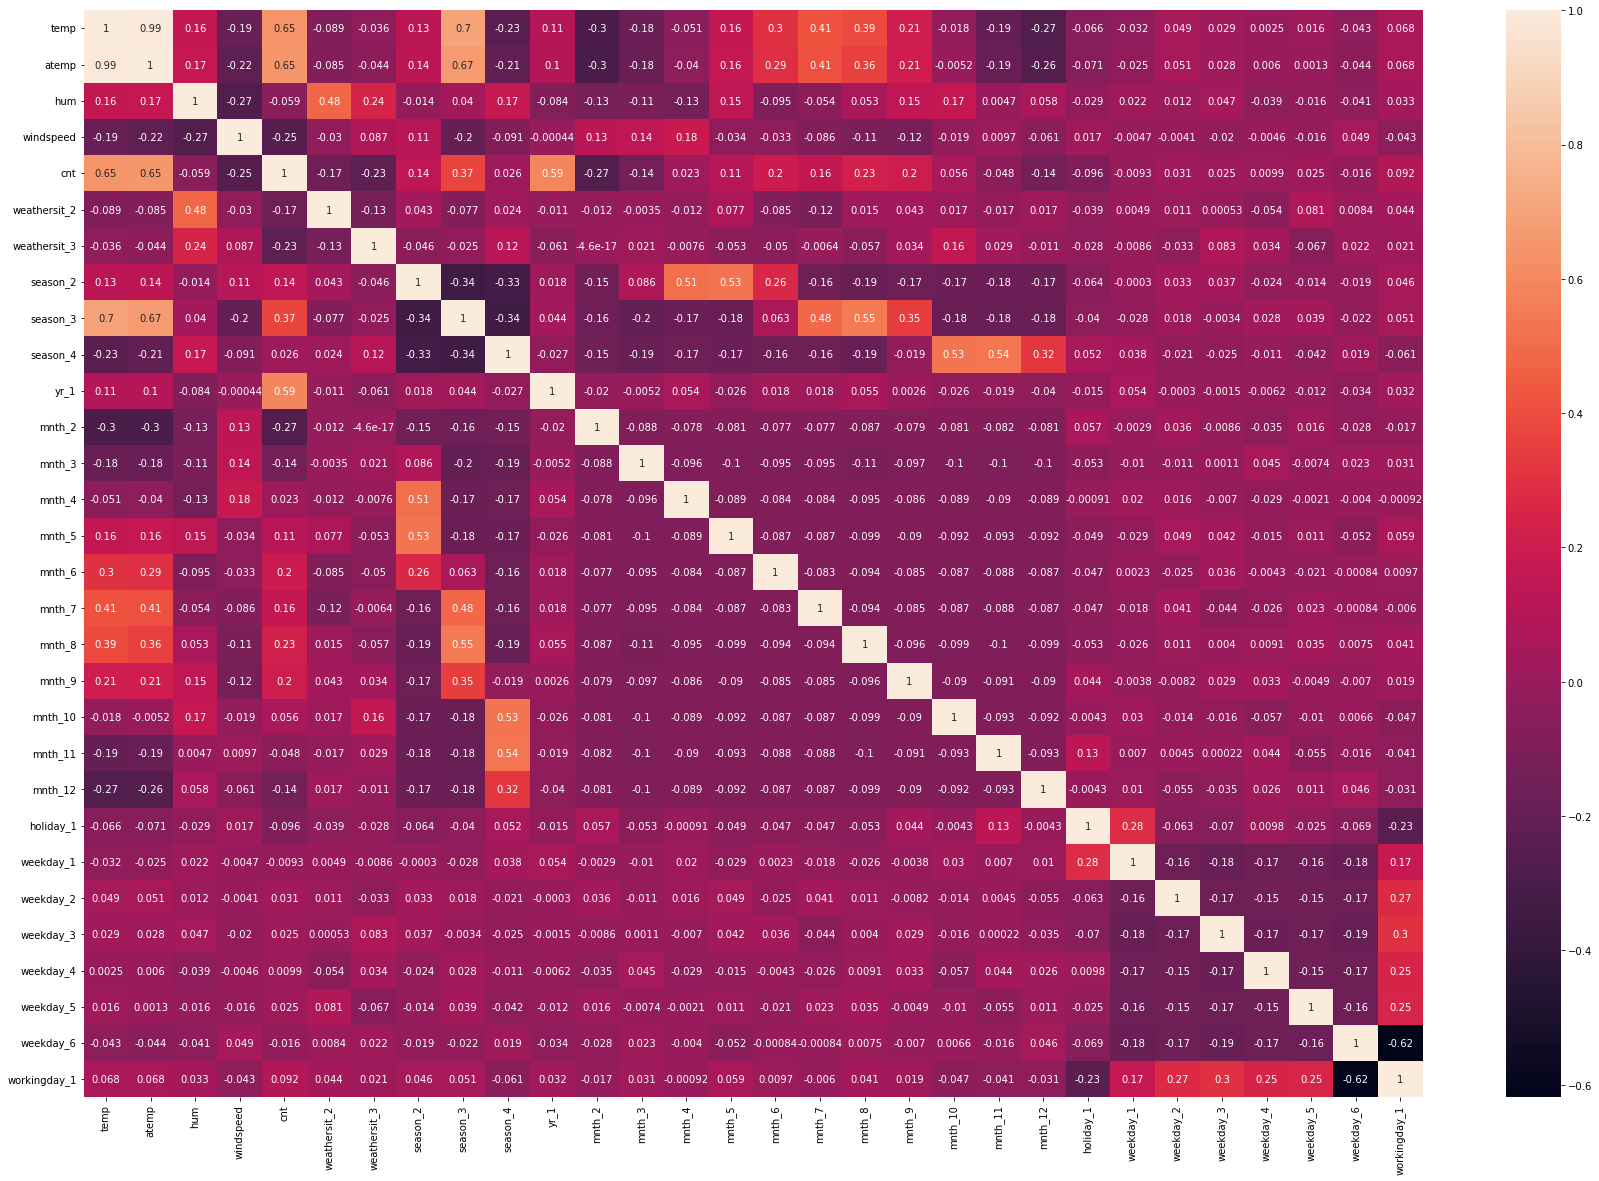

In [1858]:
#plotting a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(bike_data_train.corr(),annot=True)
plt.show()

In [1859]:
y_train=bike_data_train.pop('cnt')
X_train=bike_data_train

In [1860]:
X_train.head()


,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4,yr_1,...,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
576,1.230870,1.193181,0.515796,-0.331282,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
426,-0.421238,-0.349583,-0.070634,-0.386359,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
728,-1.295618,-1.474112,-1.046051,2.017388,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
482,-0.628327,-0.572197,-1.001847,-0.780539,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
111,-0.849222,-0.915819,0.695551,0.354275,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [1861]:
y_train.head()

576    1.401236
426   -0.215182
728   -1.380030
482   -0.136157
111   -1.438016
Name: cnt, dtype: float64

# Step:7 - Modelling begins

In [1862]:
#import statsmodels.api as sm

In [1863]:
#X_train_sm=X_train
X_train_sm = sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          -1.144706
temp            0.390468
atemp           0.055885
hum            -0.098792
windspeed      -0.138920
weathersit_2   -0.265479
weathersit_3   -1.137264
season_2        0.391274
season_3        0.202295
season_4        0.679905
yr_1            1.037190
mnth_2          0.137145
mnth_3          0.288218
mnth_4          0.281284
mnth_5          0.395203
mnth_6          0.308098
mnth_7          0.135626
mnth_8          0.380615
mnth_9          0.668261
mnth_10         0.315688
mnth_11         0.103682
mnth_12         0.083808
holiday_1      -0.185675
weekday_1      -0.044877
weekday_2      -0.030668
weekday_3       0.025271
weekday_4       0.008174
weekday_5       0.051574
weekday_6       0.241832
workingday_1    0.195148
dtype: float64

In [1864]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.81e-180
Time:                        21:51:45   Log-Likelihood:                -235.44
No. Observations:                 510   AIC:                             528.9
Df Residuals:                     481   BIC:                             651.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1447      0.103    -11.162      0.000      -1.346      -0.943
temp             0.3905      0.143      2.727      0.007       0.109       0.672
atemp            0.0559      0.131      0.426      0.670      -0.202       0.313
hum             -0.0988      0.025     -3.938      0.000      -0.148      -0.049
windspeed       -0.1389      0.020     -6.962      0.000      -0.178      -0.100
weathersit_2    -0.2655      0.047     -5.701      0.000      -0.357      -0.174
weathersit_3    -1.1373      0.118     -9.631      0.000      -1.369      -0.905
season_2         0.3913      0.105      3.713      0.000       0.184       0.598
season_3         0.2023      0.134      1.511      0.131      -0.061       0.465
season_4         0.6799      0.116      5.866      0.000       0.452       0.908
yr_1             1.0372      0.036     28.794      0.000       0.966       1.108
mnth_2           0.1371      0.092      1.489      0.137      -0.044       0.318
mnth_3           0.2882      0.100      2.886      0.004       0.092       0.484
mnth_4           0.2813      0.150      1.876      0.061      -0.013       0.576
mnth_5           0.3952      0.162      2.446      0.015       0.078       0.713
mnth_6           0.3081      0.173      1.776      0.076      -0.033       0.649
mnth_7           0.1356      0.196      0.692      0.489      -0.249       0.521
mnth_8           0.3806      0.187      2.038      0.042       0.014       0.748
mnth_9           0.6683      0.167      4.006      0.000       0.340       0.996
mnth_10          0.3157      0.154      2.050      0.041       0.013       0.618
mnth_11          0.1037      0.147      0.707      0.480      -0.184       0.392
mnth_12          0.0838      0.118      0.708      0.479      -0.149       0.316
holiday_1       -0.1857      0.106     -1.758      0.079      -0.393       0.022
weekday_1       -0.0449      0.043     -1.033      0.302      -0.130       0.040
weekday_2       -0.0307      0.050     -0.616      0.538      -0.129       0.067
weekday_3        0.0253      0.047      0.538      0.591      -0.067       0.118
weekday_4        0.0082      0.049      0.168      0.867      -0.088       0.104
weekday_5        0.0516      0.050      1.029      0.304      -0.047       0.150
weekday_6        0.2418      0.065      3.729      0.000       0.114       0.369
workingday_1     0.1951      0.042      4.666      0.000       0.113       0.277
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     8.25e+15
===============

In [1865]:
# Now we will be dropping variables based on both the below factors
# Significance ( p-value)
# VIF

In [1866]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1867]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
28,workingday_1,inf
21,holiday_1,inf
26,weekday_5,inf
25,weekday_4,inf
24,weekday_3,inf
23,weekday_2,inf
22,weekday_1,inf
0,temp,62.16
1,atemp,55.84
7,season_3,15.28


In [1868]:
#We will now try to remove the below
#High VIF and high p-value
#High p-value, Low VIF -- First we will drop these
#Low p-value, High VIF -- Then we will drop this

X=X_train.drop('atemp',axis=1)

In [1869]:
#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          -1.142160
temp            0.448210
hum            -0.098439
windspeed      -0.140741
weathersit_2   -0.265614
weathersit_3   -1.141097
season_2        0.391773
season_3        0.199973
season_4        0.680041
yr_1            1.036739
mnth_2          0.137704
mnth_3          0.288085
mnth_4          0.282402
mnth_5          0.392451
mnth_6          0.302930
mnth_7          0.131431
mnth_8          0.373286
mnth_9          0.665709
mnth_10         0.316059
mnth_11         0.104530
mnth_12         0.084915
holiday_1      -0.188656
weekday_1      -0.044270
weekday_2      -0.030889
weekday_3       0.024579
weekday_4       0.008364
weekday_5       0.049089
weekday_6       0.241838
workingday_1    0.195529
dtype: float64

In [1870]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.00e-181
Time:                        21:51:45   Log-Likelihood:                -235.53
No. Observations:                 510   AIC:                             527.1
Df Residuals:                     482   BIC:                             645.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1422      0.102    -11.166      0.000      -1.343      -0.941
temp             0.4482      0.047      9.628      0.000       0.357       0.540
hum             -0.0984      0.025     -3.929      0.000      -0.148      -0.049
windspeed       -0.1407      0.019     -7.226      0.000      -0.179      -0.102
weathersit_2    -0.2656      0.047     -5.709      0.000      -0.357      -0.174
weathersit_3    -1.1411      0.118     -9.699      0.000      -1.372      -0.910
season_2         0.3918      0.105      3.721      0.000       0.185       0.599
season_3         0.2000      0.134      1.496      0.135      -0.063       0.463
season_4         0.6800      0.116      5.873      0.000       0.453       0.908
yr_1             1.0367      0.036     28.819      0.000       0.966       1.107
mnth_2           0.1377      0.092      1.497      0.135      -0.043       0.319
mnth_3           0.2881      0.100      2.888      0.004       0.092       0.484
mnth_4           0.2824      0.150      1.885      0.060      -0.012       0.577
mnth_5           0.3925      0.161      2.433      0.015       0.075       0.709
mnth_6           0.3029      0.173      1.752      0.080      -0.037       0.643
mnth_7           0.1314      0.196      0.672      0.502      -0.253       0.516
mnth_8           0.3733      0.186      2.009      0.045       0.008       0.738
mnth_9           0.6657      0.167      3.997      0.000       0.338       0.993
mnth_10          0.3161      0.154      2.055      0.040       0.014       0.618
mnth_11          0.1045      0.146      0.714      0.476      -0.183       0.392
mnth_12          0.0849      0.118      0.718      0.473      -0.147       0.317
holiday_1       -0.1887      0.105     -1.792      0.074      -0.396       0.018
weekday_1       -0.0443      0.043     -1.021      0.308      -0.130       0.041
weekday_2       -0.0309      0.050     -0.621      0.535      -0.129       0.067
weekday_3        0.0246      0.047      0.524      0.600      -0.068       0.117
weekday_4        0.0084      0.049      0.172      0.864      -0.087       0.104
weekday_5        0.0491      0.050      0.987      0.324      -0.049       0.147
weekday_6        0.2418      0.065      3.732      0.000       0.115       0.369
workingday_1     0.1955      0.042      4.680      0.000       0.113       0.278
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     8.47e+15
==============================================================================

Notes:
[1] Stand

In [1871]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
27,workingday_1,inf
25,weekday_5,inf
24,weekday_4,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
20,holiday_1,inf
6,season_3,15.26
7,season_4,10.82
5,season_2,8.95


In [1872]:
#next dropping mnth_7 as it has a very high p-value and high VIF also

In [1873]:
X=X.drop('mnth_7',axis=1)

In [1874]:
#Building the model again

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          -1.102574
temp            0.466511
hum            -0.100655
windspeed      -0.140616
weathersit_2   -0.264021
weathersit_3   -1.137278
season_2        0.418933
season_3        0.253387
season_4        0.703965
yr_1            1.034665
mnth_2          0.119160
mnth_3          0.249764
mnth_4          0.219816
mnth_5          0.319108
mnth_6          0.209076
mnth_8          0.261054
mnth_9          0.569537
mnth_10         0.256074
mnth_11         0.054843
mnth_12         0.047260
holiday_1      -0.193723
weekday_1      -0.045095
weekday_2      -0.031398
weekday_3       0.023295
weekday_4       0.005854
weekday_5       0.048376
weekday_6       0.241644
workingday_1    0.194755
dtype: float64

In [1875]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     107.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.58e-182
Time:                        21:51:46   Log-Likelihood:                -235.77
No. Observations:                 510   AIC:                             525.5
Df Residuals:                     483   BIC:                             639.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1026      0.084    -13.189      0.000      -1.267      -0.938
temp             0.4665      0.038     12.360      0.000       0.392       0.541
hum             -0.1007      0.025     -4.055      0.000      -0.149      -0.052
windspeed       -0.1406      0.019     -7.224      0.000      -0.179      -0.102
weathersit_2    -0.2640      0.046     -5.686      0.000      -0.355      -0.173
weathersit_3    -1.1373      0.117     -9.684      0.000      -1.368      -0.907
season_2         0.4189      0.097      4.311      0.000       0.228       0.610
season_3         0.2534      0.107      2.359      0.019       0.042       0.464
season_4         0.7040      0.110      6.392      0.000       0.488       0.920
yr_1             1.0347      0.036     28.884      0.000       0.964       1.105
mnth_2           0.1192      0.088      1.358      0.175      -0.053       0.292
mnth_3           0.2498      0.082      3.052      0.002       0.089       0.411
mnth_4           0.2198      0.117      1.874      0.062      -0.011       0.450
mnth_5           0.3191      0.119      2.687      0.007       0.086       0.552
mnth_6           0.2091      0.102      2.052      0.041       0.009       0.409
mnth_8           0.2611      0.082      3.201      0.001       0.101       0.421
mnth_9           0.5695      0.085      6.679      0.000       0.402       0.737
mnth_10          0.2561      0.125      2.045      0.041       0.010       0.502
mnth_11          0.0548      0.126      0.434      0.665      -0.193       0.303
mnth_12          0.0473      0.104      0.454      0.650      -0.157       0.252
holiday_1       -0.1937      0.105     -1.845      0.066      -0.400       0.013
weekday_1       -0.0451      0.043     -1.041      0.299      -0.130       0.040
weekday_2       -0.0314      0.050     -0.631      0.528      -0.129       0.066
weekday_3        0.0233      0.047      0.497      0.619      -0.069       0.115
weekday_4        0.0059      0.049      0.121      0.904      -0.090       0.101
weekday_5        0.0484      0.050      0.974      0.331      -0.049       0.146
weekday_6        0.2416      0.065      3.731      0.000       0.114       0.369
workingday_1     0.1948      0.042      4.666      0.000       0.113       0.277
==============================================================================
Omnibus:                       81.508   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.952
Skew:                          -0.785   Prob(JB):                     1.05e-48
Kurtosis:                       5.816   Cond. No.                     2.25e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [1876]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
26,workingday_1,inf
24,weekday_5,inf
23,weekday_4,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
19,holiday_1,inf
7,season_4,9.17
5,season_2,7.12
6,season_3,5.94


In [1877]:
X=X.drop('workingday_1',axis=1)

In [1878]:

X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params


const          -1.102574
temp            0.466511
hum            -0.100655
windspeed      -0.140616
weathersit_2   -0.264021
weathersit_3   -1.137278
season_2        0.418933
season_3        0.253387
season_4        0.703965
yr_1            1.034665
mnth_2          0.119160
mnth_3          0.249764
mnth_4          0.219816
mnth_5          0.319108
mnth_6          0.209076
mnth_8          0.261054
mnth_9          0.569537
mnth_10         0.256074
mnth_11         0.054843
mnth_12         0.047260
holiday_1      -0.388478
weekday_1       0.149660
weekday_2       0.163356
weekday_3       0.218049
weekday_4       0.200609
weekday_5       0.243130
weekday_6       0.241644
dtype: float64

In [1879]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     107.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.58e-182
Time:                        21:51:46   Log-Likelihood:                -235.77
No. Observations:                 510   AIC:                             525.5
Df Residuals:                     483   BIC:                             639.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1026      0.084    -13.189      0.000      -1.267      -0.938
temp             0.4665      0.038     12.360      0.000       0.392       0.541
hum             -0.1007      0.025     -4.055      0.000      -0.149      -0.052
windspeed       -0.1406      0.019     -7.224      0.000      -0.179      -0.102
weathersit_2    -0.2640      0.046     -5.686      0.000      -0.355      -0.173
weathersit_3    -1.1373      0.117     -9.684      0.000      -1.368      -0.907
season_2         0.4189      0.097      4.311      0.000       0.228       0.610
season_3         0.2534      0.107      2.359      0.019       0.042       0.464
season_4         0.7040      0.110      6.392      0.000       0.488       0.920
yr_1             1.0347      0.036     28.884      0.000       0.964       1.105
mnth_2           0.1192      0.088      1.358      0.175      -0.053       0.292
mnth_3           0.2498      0.082      3.052      0.002       0.089       0.411
mnth_4           0.2198      0.117      1.874      0.062      -0.011       0.450
mnth_5           0.3191      0.119      2.687      0.007       0.086       0.552
mnth_6           0.2091      0.102      2.052      0.041       0.009       0.409
mnth_8           0.2611      0.082      3.201      0.001       0.101       0.421
mnth_9           0.5695      0.085      6.679      0.000       0.402       0.737
mnth_10          0.2561      0.125      2.045      0.041       0.010       0.502
mnth_11          0.0548      0.126      0.434      0.665      -0.193       0.303
mnth_12          0.0473      0.104      0.454      0.650      -0.157       0.252
holiday_1       -0.3885      0.119     -3.276      0.001      -0.621      -0.156
weekday_1        0.1497      0.067      2.247      0.025       0.019       0.281
weekday_2        0.1634      0.067      2.432      0.015       0.031       0.295
weekday_3        0.2180      0.064      3.387      0.001       0.092       0.345
weekday_4        0.2006      0.067      2.977      0.003       0.068       0.333
weekday_5        0.2431      0.068      3.570      0.000       0.109       0.377
weekday_6        0.2416      0.065      3.731      0.000       0.114       0.369
==============================================================================
Omnibus:                       81.508   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.952
Skew:                          -0.785   Prob(JB):                     1.05e-48
Kurtosis:                       5.816   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1880]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 


,Features,VIF
7,season_4,9.17
5,season_2,7.12
6,season_3,5.94
17,mnth_11,4.43
16,mnth_10,4.10
0,temp,3.63
12,mnth_5,3.47
11,mnth_4,3.36
18,mnth_12,2.87
3,weathersit_2,2.41


In [1881]:
# R squared value remained unchanged on dropping workingday column. Also all other infinite VIF values got removed.
#Now we will remove high p-values values one by one

In [1882]:
X=X.drop('mnth_12',axis=1)

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params


const          -1.095232
temp            0.463579
hum            -0.099447
windspeed      -0.140020
weathersit_2   -0.265514
weathersit_3   -1.139096
season_2        0.419402
season_3        0.255998
season_4        0.735141
yr_1            1.034356
mnth_2          0.109282
mnth_3          0.241293
mnth_4          0.212216
mnth_5          0.313001
mnth_6          0.204338
mnth_8          0.255118
mnth_9          0.555487
mnth_10         0.217525
mnth_11         0.014666
holiday_1      -0.385411
weekday_1       0.149130
weekday_2       0.162811
weekday_3       0.218221
weekday_4       0.201918
weekday_5       0.243585
weekday_6       0.242009
dtype: float64

In [1883]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.72e-183
Time:                        21:51:46   Log-Likelihood:                -235.88
No. Observations:                 510   AIC:                             523.8
Df Residuals:                     484   BIC:                             633.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0952      0.082    -13.364      0.000      -1.256      -0.934
temp             0.4636      0.037     12.476      0.000       0.391       0.537
hum             -0.0994      0.025     -4.033      0.000      -0.148      -0.051
windspeed       -0.1400      0.019     -7.216      0.000      -0.178      -0.102
weathersit_2    -0.2655      0.046     -5.737      0.000      -0.356      -0.175
weathersit_3    -1.1391      0.117     -9.713      0.000      -1.370      -0.909
season_2         0.4194      0.097      4.320      0.000       0.229       0.610
season_3         0.2560      0.107      2.388      0.017       0.045       0.467
season_4         0.7351      0.086      8.540      0.000       0.566       0.904
yr_1             1.0344      0.036     28.904      0.000       0.964       1.105
mnth_2           0.1093      0.085      1.287      0.199      -0.058       0.276
mnth_3           0.2413      0.080      3.031      0.003       0.085       0.398
mnth_4           0.2122      0.116      1.830      0.068      -0.016       0.440
mnth_5           0.3130      0.118      2.655      0.008       0.081       0.545
mnth_6           0.2043      0.101      2.017      0.044       0.005       0.403
mnth_8           0.2551      0.080      3.171      0.002       0.097       0.413
mnth_9           0.5555      0.079      6.996      0.000       0.399       0.712
mnth_10          0.2175      0.092      2.363      0.019       0.037       0.398
mnth_11          0.0147      0.090      0.163      0.871      -0.163       0.192
holiday_1       -0.3854      0.118     -3.259      0.001      -0.618      -0.153
weekday_1        0.1491      0.067      2.241      0.025       0.018       0.280
weekday_2        0.1628      0.067      2.426      0.016       0.031       0.295
weekday_3        0.2182      0.064      3.393      0.001       0.092       0.345
weekday_4        0.2019      0.067      3.001      0.003       0.070       0.334
weekday_5        0.2436      0.068      3.580      0.000       0.110       0.377
weekday_6        0.2420      0.065      3.740      0.000       0.115       0.369
==============================================================================
Omnibus:                       81.731   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.448
Skew:                          -0.786   Prob(JB):                     4.97e-49
Kurtosis:                       5.828   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1884]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
5,season_2,7.09
6,season_3,5.62
7,season_4,4.56
12,mnth_5,3.46
11,mnth_4,3.32
0,temp,3.29
3,weathersit_2,2.40
13,mnth_6,2.31
16,mnth_10,2.30
17,mnth_11,2.30


In [1885]:

X=X.drop('mnth_11',axis=1)

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          -1.095346
temp            0.463405
hum            -0.099541
windspeed      -0.139736
weathersit_2   -0.265461
weathersit_3   -1.138634
season_2        0.420110
season_3        0.257561
season_4        0.743306
yr_1            1.034311
mnth_2          0.109006
mnth_3          0.241045
mnth_4          0.211473
mnth_5          0.312682
mnth_6          0.203779
mnth_8          0.254153
mnth_9          0.552871
mnth_10         0.209599
holiday_1      -0.382815
weekday_1       0.148632
weekday_2       0.162864
weekday_3       0.218321
weekday_4       0.201998
weekday_5       0.243167
weekday_6       0.241611
dtype: float64

In [1886]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.45e-184
Time:                        21:51:46   Log-Likelihood:                -235.89
No. Observations:                 510   AIC:                             521.8
Df Residuals:                     485   BIC:                             627.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0953      0.082    -13.379      0.000      -1.256      -0.934
temp             0.4634      0.037     12.489      0.000       0.391       0.536
hum             -0.0995      0.025     -4.042      0.000      -0.148      -0.051
windspeed       -0.1397      0.019     -7.238      0.000      -0.178      -0.102
weathersit_2    -0.2655      0.046     -5.742      0.000      -0.356      -0.175
weathersit_3    -1.1386      0.117     -9.721      0.000      -1.369      -0.908
season_2         0.4201      0.097      4.336      0.000       0.230       0.611
season_3         0.2576      0.107      2.415      0.016       0.048       0.467
season_4         0.7433      0.070     10.645      0.000       0.606       0.881
yr_1             1.0343      0.036     28.933      0.000       0.964       1.105
mnth_2           0.1090      0.085      1.285      0.199      -0.058       0.276
mnth_3           0.2410      0.080      3.031      0.003       0.085       0.397
mnth_4           0.2115      0.116      1.826      0.068      -0.016       0.439
mnth_5           0.3127      0.118      2.655      0.008       0.081       0.544
mnth_6           0.2038      0.101      2.015      0.044       0.005       0.402
mnth_8           0.2542      0.080      3.171      0.002       0.097       0.412
mnth_9           0.5529      0.078      7.117      0.000       0.400       0.705
mnth_10          0.2096      0.078      2.688      0.007       0.056       0.363
holiday_1       -0.3828      0.117     -3.270      0.001      -0.613      -0.153
weekday_1        0.1486      0.066      2.238      0.026       0.018       0.279
weekday_2        0.1629      0.067      2.429      0.015       0.031       0.295
weekday_3        0.2183      0.064      3.398      0.001       0.092       0.345
weekday_4        0.2020      0.067      3.006      0.003       0.070       0.334
weekday_5        0.2432      0.068      3.580      0.000       0.110       0.377
weekday_6        0.2416      0.065      3.740      0.000       0.115       0.369
==============================================================================
Omnibus:                       81.471   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.542
Skew:                          -0.784   Prob(JB):                     7.81e-49
Kurtosis:                       5.823   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1887]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
5,season_2,7.07
6,season_3,5.55
12,mnth_5,3.46
11,mnth_4,3.31
0,temp,3.29
7,season_4,2.55
3,weathersit_2,2.40
13,mnth_6,2.30
14,mnth_8,2.02
1,hum,1.99


In [1888]:
X=X.drop('season_2',axis=1)

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          -1.000213
temp            0.508649
hum            -0.099829
windspeed      -0.142394
weathersit_2   -0.254869
weathersit_3   -1.113403
season_3        0.060622
season_4        0.667035
yr_1            1.028137
mnth_2          0.062930
mnth_3          0.319645
mnth_4          0.543837
mnth_5          0.610945
mnth_6          0.400452
mnth_8          0.299590
mnth_9          0.592089
mnth_10         0.187761
holiday_1      -0.395074
weekday_1       0.155822
weekday_2       0.166997
weekday_3       0.216434
weekday_4       0.202366
weekday_5       0.241519
weekday_6       0.245250
dtype: float64

In [1889]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.96e-181
Time:                        21:51:47   Log-Likelihood:                -245.59
No. Observations:                 510   AIC:                             539.2
Df Residuals:                     486   BIC:                             640.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0002      0.080    -12.455      0.000      -1.158      -0.842
temp             0.5086      0.036     14.031      0.000       0.437       0.580
hum             -0.0998      0.025     -3.981      0.000      -0.149      -0.051
windspeed       -0.1424      0.020     -7.248      0.000      -0.181      -0.104
weathersit_2    -0.2549      0.047     -5.422      0.000      -0.347      -0.163
weathersit_3    -1.1134      0.119     -9.348      0.000      -1.347      -0.879
season_3         0.0606      0.098      0.617      0.537      -0.132       0.254
season_4         0.6670      0.069      9.695      0.000       0.532       0.802
yr_1             1.0281      0.036     28.270      0.000       0.957       1.100
mnth_2           0.0629      0.086      0.734      0.463      -0.105       0.231
mnth_3           0.3196      0.079      4.055      0.000       0.165       0.475
mnth_4           0.5438      0.088      6.156      0.000       0.370       0.717
mnth_5           0.6109      0.097      6.277      0.000       0.420       0.802
mnth_6           0.4005      0.092      4.352      0.000       0.220       0.581
mnth_8           0.2996      0.081      3.703      0.000       0.141       0.459
mnth_9           0.5921      0.079      7.538      0.000       0.438       0.746
mnth_10          0.1878      0.079      2.370      0.018       0.032       0.343
holiday_1       -0.3951      0.119     -3.315      0.001      -0.629      -0.161
weekday_1        0.1558      0.068      2.305      0.022       0.023       0.289
weekday_2        0.1670      0.068      2.447      0.015       0.033       0.301
weekday_3        0.2164      0.065      3.309      0.001       0.088       0.345
weekday_4        0.2024      0.068      2.958      0.003       0.068       0.337
weekday_5        0.2415      0.069      3.493      0.001       0.106       0.377
weekday_6        0.2453      0.066      3.729      0.000       0.116       0.374
==============================================================================
Omnibus:                       65.580   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.710
Skew:                          -0.652   Prob(JB):                     3.82e-37
Kurtosis:                       5.488   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1890]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
5,season_3,4.89
0,temp,3.19
6,season_4,2.51
3,weathersit_2,2.39
1,hum,1.99
13,mnth_8,1.98
7,yr_1,1.97
17,weekday_1,1.87
19,weekday_3,1.77
22,weekday_6,1.72


In [1891]:
X=X.drop('season_3',axis=1)

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          -0.969219
temp            0.524451
hum            -0.102258
windspeed      -0.143305
weathersit_2   -0.253274
weathersit_3   -1.105523
season_4        0.645228
yr_1            1.026055
mnth_2          0.049671
mnth_3          0.297652
mnth_4          0.516217
mnth_5          0.573730
mnth_6          0.375171
mnth_8          0.311783
mnth_9          0.603817
mnth_10         0.180852
holiday_1      -0.398850
weekday_1       0.156091
weekday_2       0.166481
weekday_3       0.215000
weekday_4       0.201898
weekday_5       0.241414
weekday_6       0.243753
dtype: float64

In [1892]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.20e-182
Time:                        21:51:47   Log-Likelihood:                -245.79
No. Observations:                 510   AIC:                             537.6
Df Residuals:                     487   BIC:                             635.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9692      0.063    -15.479      0.000      -1.092      -0.846
temp             0.5245      0.026     20.451      0.000       0.474       0.575
hum             -0.1023      0.025     -4.132      0.000      -0.151      -0.054
windspeed       -0.1433      0.020     -7.320      0.000      -0.182      -0.105
weathersit_2    -0.2533      0.047     -5.399      0.000      -0.345      -0.161
weathersit_3    -1.1055      0.118     -9.342      0.000      -1.338      -0.873
season_4         0.6452      0.059     10.937      0.000       0.529       0.761
yr_1             1.0261      0.036     28.353      0.000       0.955       1.097
mnth_2           0.0497      0.083      0.599      0.549      -0.113       0.213
mnth_3           0.2977      0.070      4.236      0.000       0.160       0.436
mnth_4           0.5162      0.076      6.782      0.000       0.367       0.666
mnth_5           0.5737      0.076      7.515      0.000       0.424       0.724
mnth_6           0.3752      0.082      4.556      0.000       0.213       0.537
mnth_8           0.3118      0.078      3.977      0.000       0.158       0.466
mnth_9           0.6038      0.076      7.928      0.000       0.454       0.753
mnth_10          0.1809      0.078      2.307      0.021       0.027       0.335
holiday_1       -0.3989      0.119     -3.354      0.001      -0.633      -0.165
weekday_1        0.1561      0.068      2.311      0.021       0.023       0.289
weekday_2        0.1665      0.068      2.441      0.015       0.032       0.300
weekday_3        0.2150      0.065      3.291      0.001       0.087       0.343
weekday_4        0.2019      0.068      2.953      0.003       0.068       0.336
weekday_5        0.2414      0.069      3.493      0.001       0.106       0.377
weekday_6        0.2438      0.066      3.712      0.000       0.115       0.373
==============================================================================
Omnibus:                       63.485   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.465
Skew:                          -0.640   Prob(JB):                     3.89e-35
Kurtosis:                       5.412   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1893]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
5,season_4,2.36
3,weathersit_2,2.32
0,temp,2.07
6,yr_1,1.95
1,hum,1.91
12,mnth_8,1.68
16,weekday_1,1.66
14,mnth_10,1.63
18,weekday_3,1.59
21,weekday_6,1.53


In [1894]:
X=X.drop('mnth_2',axis=1)

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.33e-183
Time:                        21:51:47   Log-Likelihood:                -245.98
No. Observations:                 510   AIC:                             536.0
Df Residuals:                     488   BIC:                             629.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9586      0.060    -15.976      0.000      -1.076      -0.841
temp             0.5207      0.025     20.957      0.000       0.472       0.570
hum             -0.1026      0.025     -4.150      0.000      -0.151      -0.054
windspeed       -0.1422      0.019     -7.300      0.000      -0.181      -0.104
weathersit_2    -0.2534      0.047     -5.407      0.000      -0.346      -0.161
weathersit_3    -1.1041      0.118     -9.338      0.000      -1.336      -0.872
season_4         0.6334      0.056     11.398      0.000       0.524       0.743
yr_1             1.0265      0.036     28.390      0.000       0.955       1.098
mnth_3           0.2848      0.067      4.259      0.000       0.153       0.416
mnth_4           0.5043      0.073      6.869      0.000       0.360       0.648
mnth_5           0.5655      0.075      7.535      0.000       0.418       0.713
mnth_6           0.3688      0.082      4.520      0.000       0.208       0.529
mnth_8           0.3064      0.078      3.937      0.000       0.153       0.459
mnth_9           0.5993      0.076      7.912      0.000       0.450       0.748
mnth_10          0.1822      0.078      2.326      0.020       0.028       0.336
holiday_1       -0.3967      0.119     -3.340      0.001      -0.630      -0.163
weekday_1        0.1552      0.067      2.300      0.022       0.023       0.288
weekday_2        0.1676      0.068      2.460      0.014       0.034       0.301
weekday_3        0.2147      0.065      3.288      0.001       0.086       0.343
weekday_4        0.2004      0.068      2.934      0.004       0.066       0.335
weekday_5        0.2411      0.069      3.491      0.001       0.105       0.377
weekday_6        0.2421      0.066      3.692      0.000       0.113       0.371
==============================================================================
Omnibus:                       64.458   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.500
Skew:                          -0.648   Prob(JB):                     8.52e-36
Kurtosis:                       5.433   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1895]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
3,weathersit_2,2.32
5,season_4,2.20
6,yr_1,1.93
0,temp,1.91
1,hum,1.91
11,mnth_8,1.68
15,weekday_1,1.63
13,mnth_10,1.63
17,weekday_3,1.54
20,weekday_6,1.50


In [1896]:
X=X.drop('mnth_10',axis=1)

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.13e-183
Time:                        21:51:48   Log-Likelihood:                -248.79
No. Observations:                 510   AIC:                             539.6
Df Residuals:                     489   BIC:                             628.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9457      0.060    -15.757      0.000      -1.064      -0.828
temp             0.5321      0.024     21.744      0.000       0.484       0.580
hum             -0.0999      0.025     -4.027      0.000      -0.149      -0.051
windspeed       -0.1399      0.020     -7.156      0.000      -0.178      -0.101
weathersit_2    -0.2519      0.047     -5.350      0.000      -0.344      -0.159
weathersit_3    -1.0795      0.118     -9.125      0.000      -1.312      -0.847
season_4         0.6921      0.050     13.911      0.000       0.594       0.790
yr_1             1.0245      0.036     28.216      0.000       0.953       1.096
mnth_3           0.2820      0.067      4.200      0.000       0.150       0.414
mnth_4           0.4972      0.074      6.748      0.000       0.352       0.642
mnth_5           0.5501      0.075      7.326      0.000       0.403       0.698
mnth_6           0.3500      0.082      4.291      0.000       0.190       0.510
mnth_8           0.2852      0.078      3.674      0.000       0.133       0.438
mnth_9           0.5692      0.075      7.593      0.000       0.422       0.716
holiday_1       -0.4045      0.119     -3.391      0.001      -0.639      -0.170
weekday_1        0.1535      0.068      2.265      0.024       0.020       0.287
weekday_2        0.1621      0.068      2.370      0.018       0.028       0.296
weekday_3        0.2097      0.066      3.199      0.001       0.081       0.338
weekday_4        0.1902      0.068      2.778      0.006       0.056       0.325
weekday_5        0.2389      0.069      3.445      0.001       0.103       0.375
weekday_6        0.2378      0.066      3.611      0.000       0.108       0.367
==============================================================================
Omnibus:                       55.785   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.022
Skew:                          -0.588   Prob(JB):                     9.62e-29
Kurtosis:                       5.165   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1897]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
3,weathersit_2,2.31
6,yr_1,1.93
1,hum,1.90
0,temp,1.85
11,mnth_8,1.66
14,weekday_1,1.63
5,season_4,1.63
16,weekday_3,1.54
19,weekday_6,1.50
10,mnth_6,1.45


In [1898]:
X=X.drop('weekday_1',axis=1)

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.36e-183
Time:                        21:51:49   Log-Likelihood:                -251.45
No. Observations:                 510   AIC:                             542.9
Df Residuals:                     490   BIC:                             627.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8769      0.052    -16.866      0.000      -0.979      -0.775
temp             0.5316      0.025     21.635      0.000       0.483       0.580
hum             -0.1009      0.025     -4.050      0.000      -0.150      -0.052
windspeed       -0.1406      0.020     -7.166      0.000      -0.179      -0.102
weathersit_2    -0.2467      0.047     -5.224      0.000      -0.339      -0.154
weathersit_3    -1.0687      0.119     -9.004      0.000      -1.302      -0.836
season_4         0.6930      0.050     13.872      0.000       0.595       0.791
yr_1             1.0278      0.036     28.211      0.000       0.956       1.099
mnth_3           0.2882      0.067      4.278      0.000       0.156       0.421
mnth_4           0.5007      0.074      6.770      0.000       0.355       0.646
mnth_5           0.5522      0.075      7.323      0.000       0.404       0.700
mnth_6           0.3545      0.082      4.329      0.000       0.194       0.515
mnth_8           0.2906      0.078      3.729      0.000       0.137       0.444
mnth_9           0.5731      0.075      7.615      0.000       0.425       0.721
holiday_1       -0.3417      0.117     -2.933      0.004      -0.571      -0.113
weekday_2        0.0873      0.060      1.451      0.147      -0.031       0.205
weekday_3        0.1343      0.057      2.368      0.018       0.023       0.246
weekday_4        0.1132      0.060      1.898      0.058      -0.004       0.230
weekday_5        0.1628      0.061      2.672      0.008       0.043       0.282
weekday_6        0.1627      0.057      2.848      0.005       0.050       0.275
==============================================================================
Omnibus:                       55.819   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.833
Skew:                          -0.613   Prob(JB):                     9.52e-27
Kurtosis:                       5.033   Cond. No.                         9.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1899]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 


,Features,VIF
3,weathersit_2,2.24
1,hum,1.89
0,temp,1.83
6,yr_1,1.83
11,mnth_8,1.59
5,season_4,1.53
15,weekday_3,1.38
10,mnth_6,1.38
18,weekday_6,1.35
12,mnth_9,1.31


In [1900]:
X=X.drop('weekday_2',axis=1)

#X_train_sm=X_train
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          -0.848549
temp            0.533416
hum            -0.102214
windspeed      -0.140660
weathersit_2   -0.244170
weathersit_3   -1.067503
season_4        0.691877
yr_1            1.026140
mnth_3          0.288702
mnth_4          0.500550
mnth_5          0.554948
mnth_6          0.349569
mnth_8          0.290484
mnth_9          0.573458
holiday_1      -0.362610
weekday_3       0.106169
weekday_4       0.085759
weekday_5       0.134529
weekday_6       0.134674
dtype: float64

In [1901]:
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
3,weathersit_2,2.19
1,hum,1.86
0,temp,1.83
6,yr_1,1.80
11,mnth_8,1.55
5,season_4,1.47
10,mnth_6,1.36
14,weekday_3,1.30
12,mnth_9,1.29
17,weekday_6,1.28


In [1902]:
#Now all VIF are below 5 and all p-values are small

In [1903]:
#Residual Analysis
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred




576    0.828034
426    0.193667
728   -0.690356
482    0.445678
111   -1.031557
         ...   
578    1.416182
53    -1.209692
350   -0.990995
79    -1.230828
520    0.412259
Length: 510, dtype: float64

In [1904]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   temp          510 non-null    float64
 2   hum           510 non-null    float64
 3   windspeed     510 non-null    float64
 4   weathersit_2  510 non-null    uint8  
 5   weathersit_3  510 non-null    uint8  
 6   season_4      510 non-null    uint8  
 7   yr_1          510 non-null    uint8  
 8   mnth_3        510 non-null    uint8  
 9   mnth_4        510 non-null    uint8  
 10  mnth_5        510 non-null    uint8  
 11  mnth_6        510 non-null    uint8  
 12  mnth_8        510 non-null    uint8  
 13  mnth_9        510 non-null    uint8  
 14  holiday_1     510 non-null    uint8  
 15  weekday_3     510 non-null    uint8  
 16  weekday_4     510 non-null    uint8  
 17  weekday_5     510 non-null    uint8  
 18  weekday_6     510 non-null  

<AxesSubplot:ylabel='Density'>

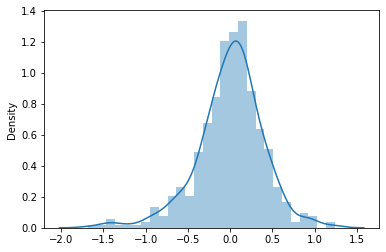

In [1905]:
residuals=y_train-y_train_pred
sns.distplot(residuals)

In [1906]:
#distribution is centred around zero

# Step : 8 Predictions and Evaluation on the Test set

In [1907]:
#Doing transformation on the test set also
bike_data_test[cont_variables] = scaler.transform(bike_data_test[cont_variables])
bike_data_test.head()

,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4,...,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
184,1.304506,1.208775,0.047244,-1.395126,0.799313,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
535,1.612837,1.552446,-0.276917,-0.985373,0.885522,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
299,-0.112907,-0.080166,1.284930,0.078536,-0.937183,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
221,1.525401,1.329807,-1.464502,0.110155,0.151206,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
152,1.240076,1.075935,-2.307309,1.276437,0.247678,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1908]:
bike_data_test.describe()

,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4,...,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.094304,0.092790,-0.084140,-0.044745,0.038600,0.318182,0.027273,0.263636,0.245455,0.236364,...,0.072727,0.086364,0.036364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.700000
std,1.033465,1.024502,1.020528,0.940739,0.977532,0.466833,0.163248,0.441609,0.431338,0.425817,...,0.260281,0.281541,0.187620,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.459303
min,-2.175395,-2.295963,-2.666825,-2.143940,-2.075347,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.806655,-0.793052,-0.832398,-0.719418,-0.601712,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.091882,0.148424,-0.170826,-0.122362,0.049859,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.968557,0.943214,0.640461,0.482415,0.732603,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.980997,2.204405,2.413579,2.868429,2.006239,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1909]:
y_test = bike_data_test.pop('cnt')
X_test= bike_data_test

In [1910]:
#Dropping variables which we dropped from training set

In [1911]:
X_test_sm = sm.add_constant(X_test)

In [1912]:
X_test_sm=X_test_sm.drop(['atemp','mnth_7','mnth_12','mnth_11','season_2','workingday_1','season_3','mnth_2','weekday_2','weekday_1','mnth_10'],axis=1)

In [1913]:
X_test_sm.shape

(220, 19)

In [1914]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   temp          220 non-null    float64
 2   hum           220 non-null    float64
 3   windspeed     220 non-null    float64
 4   weathersit_2  220 non-null    uint8  
 5   weathersit_3  220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   yr_1          220 non-null    uint8  
 8   mnth_3        220 non-null    uint8  
 9   mnth_4        220 non-null    uint8  
 10  mnth_5        220 non-null    uint8  
 11  mnth_6        220 non-null    uint8  
 12  mnth_8        220 non-null    uint8  
 13  mnth_9        220 non-null    uint8  
 14  holiday_1     220 non-null    uint8  
 15  weekday_3     220 non-null    uint8  
 16  weekday_4     220 non-null    uint8  
 17  weekday_5     220 non-null    uint8  
 18  weekday_6     220 non-null  

In [1915]:
y_test_pred = lr_model.predict(X_test_sm)

In [1916]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8137750245661812

In [1917]:
#Final equation
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.01e-183
Time:                        21:51:54   Log-Likelihood:                -252.54
No. Observations:                 510   AIC:                             543.1
Df Residuals:                     491   BIC:                             623.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8485      0.048    -17.594      0.000      -0.943      -0.754
temp             0.5334      0.025     21.713      0.000       0.485       0.582
hum             -0.1022      0.025     -4.102      0.000      -0.151      -0.053
windspeed       -0.1407      0.020     -7.159      0.000      -0.179      -0.102
weathersit_2    -0.2442      0.047     -5.168      0.000      -0.337      -0.151
weathersit_3    -1.0675      0.119     -8.984      0.000      -1.301      -0.834
season_4         0.6919      0.050     13.836      0.000       0.594       0.790
yr_1             1.0261      0.036     28.147      0.000       0.955       1.098
mnth_3           0.2887      0.067      4.280      0.000       0.156       0.421
mnth_4           0.5005      0.074      6.760      0.000       0.355       0.646
mnth_5           0.5549      0.075      7.354      0.000       0.407       0.703
mnth_6           0.3496      0.082      4.268      0.000       0.189       0.511
mnth_8           0.2905      0.078      3.723      0.000       0.137       0.444
mnth_9           0.5735      0.075      7.611      0.000       0.425       0.721
holiday_1       -0.3626      0.116     -3.133      0.002      -0.590      -0.135
weekday_3        0.1062      0.053      1.990      0.047       0.001       0.211
weekday_4        0.0858      0.057      1.514      0.131      -0.026       0.197
weekday_5        0.1345      0.058      2.328      0.020       0.021       0.248
weekday_6        0.1347      0.054      2.502      0.013       0.029       0.240
==============================================================================
Omnibus:                       55.201   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.421
Skew:                          -0.619   Prob(JB):                     1.42e-25
Kurtosis:                       4.963   Cond. No.                         9.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1918]:
#Below is the final equation
#cnt =  -0.8485 + 0.5334*temp + 0.6919*season_4 + 0.5005*mnth_4 + 0.5549*mnth_5 + 0.3496*mnth_6 + 0.5735*mnth_9 -0.3626*holiday_1 + 0.1062*weekday_3 + 0.0858*weekday_4 + 0.1345*weekday_5 + 0.1347*weekday_6 -0.1022*hum -0.1407*windspeed -0.2442*weathersit_2 -1.0675*weathersit_3 + 1.0261*yr_1 + 0.2887*mnth_3 + 0.2905mnth_8

# Step: 9 - Using RFE - recursive feature elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [1919]:
#Using number of variables as 10 to begin with
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [1920]:
#These are the features with rfe say are important
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 12),
 ('hum', False, 6),
 ('windspeed', False, 5),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', False, 2),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('holiday_1', True, 1),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('workingday_1', True, 1)]

In [1921]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'weathersit_2', 'weathersit_3', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10',
       'holiday_1', 'weekday_6', 'workingday_1'],
      dtype='object')

In [1922]:
#Now building model using stats model
X_train_rfe = X_train[col]
X_train_rfe =  sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     162.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.23e-180
Time:                        21:51:55   Log-Likelihood:                -269.60
No. Observations:                 510   AIC:                             571.2
Df Residuals:                     494   BIC:                             638.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9993      0.075    -13.272      0.000      -1.147      -0.851
temp             0.4531      0.038     12.052      0.000       0.379       0.527
weathersit_2    -0.3684      0.040     -9.198      0.000      -0.447      -0.290
weathersit_3    -1.3740      0.113    -12.186      0.000      -1.595      -1.152
season_2         0.5032      0.072      6.972      0.000       0.361       0.645
season_3         0.2569      0.104      2.480      0.013       0.053       0.460
season_4         0.6827      0.062     10.935      0.000       0.560       0.805
yr_1             1.0451      0.037     27.869      0.000       0.971       1.119
mnth_5           0.1351      0.086      1.565      0.118      -0.034       0.305
mnth_6           0.1152      0.084      1.370      0.171      -0.050       0.281
mnth_8           0.2208      0.083      2.647      0.008       0.057       0.385
mnth_9           0.5213      0.081      6.448      0.000       0.362       0.680
mnth_10          0.1729      0.082      2.104      0.036       0.011       0.334
holiday_1       -0.2396      0.126     -1.895      0.059      -0.488       0.009
weekday_6        0.2495      0.068      3.668      0.000       0.116       0.383
workingday_1     0.2146      0.054      3.968      0.000       0.108       0.321
==============================================================================
Omnibus:                       86.631   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.196
Skew:                          -0.766   Prob(JB):                     4.33e-63
Kurtosis:                       6.341   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1923]:
X=X_train_rfe.drop('mnth_6',axis=1)

X_train_lm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.18e-180
Time:                        21:51:55   Log-Likelihood:                -270.56
No. Observations:                 510   AIC:                             571.1
Df Residuals:                     495   BIC:                             634.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9778      0.074    -13.266      0.000      -1.123      -0.833
temp             0.4710      0.035     13.361      0.000       0.402       0.540
weathersit_2    -0.3695      0.040     -9.218      0.000      -0.448      -0.291
weathersit_3    -1.3799      0.113    -12.238      0.000      -1.601      -1.158
season_2         0.5175      0.071      7.241      0.000       0.377       0.658
season_3         0.2431      0.103      2.356      0.019       0.040       0.446
season_4         0.6764      0.062     10.853      0.000       0.554       0.799
yr_1             1.0424      0.037     27.811      0.000       0.969       1.116
mnth_5           0.0922      0.080      1.145      0.253      -0.066       0.250
mnth_8           0.1940      0.081      2.390      0.017       0.035       0.353
mnth_9           0.5020      0.080      6.300      0.000       0.345       0.658
mnth_10          0.1616      0.082      1.974      0.049       0.001       0.322
holiday_1       -0.2449      0.126     -1.937      0.053      -0.493       0.004
weekday_6        0.2495      0.068      3.665      0.000       0.116       0.383
workingday_1     0.2142      0.054      3.957      0.000       0.108       0.321
==============================================================================
Omnibus:                       85.238   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.351
Skew:                          -0.770   Prob(JB):                     5.35e-59
Kurtosis:                       6.202   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1924]:
#No drop in the R-squared , no change in the predictive power
#Now removing mnth_5 as it again has higher p-value
X=X.drop('mnth_5',axis=1)

X_train_lm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.62e-181
Time:                        21:51:55   Log-Likelihood:                -271.24
No. Observations:                 510   AIC:                             570.5
Df Residuals:                     496   BIC:                             629.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9684      0.073    -13.216      0.000      -1.112      -0.824
temp             0.4792      0.035     13.876      0.000       0.411       0.547
weathersit_2    -0.3659      0.040     -9.154      0.000      -0.444      -0.287
weathersit_3    -1.3819      0.113    -12.253      0.000      -1.603      -1.160
season_2         0.5383      0.069      7.785      0.000       0.402       0.674
season_3         0.2253      0.102      2.208      0.028       0.025       0.426
season_4         0.6725      0.062     10.804      0.000       0.550       0.795
yr_1             1.0394      0.037     27.790      0.000       0.966       1.113
mnth_8           0.1936      0.081      2.384      0.018       0.034       0.353
mnth_9           0.5022      0.080      6.301      0.000       0.346       0.659
mnth_10          0.1572      0.082      1.922      0.055      -0.003       0.318
holiday_1       -0.2475      0.126     -1.957      0.051      -0.496       0.001
weekday_6        0.2468      0.068      3.626      0.000       0.113       0.381
workingday_1     0.2143      0.054      3.958      0.000       0.108       0.321
==============================================================================
Omnibus:                       83.418   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.432
Skew:                          -0.769   Prob(JB):                     4.16e-55
Kurtosis:                       6.069   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1925]:
#Very less drop in the R-squared , not much change  in the predictive power
#Now removing mnth_5 as it again has higher p-value
X=X.drop('mnth_10',axis=1)

X_train_lm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.99e-182
Time:                        21:51:55   Log-Likelihood:                -273.13
No. Observations:                 510   AIC:                             572.3
Df Residuals:                     497   BIC:                             627.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9488      0.073    -13.041      0.000      -1.092      -0.806
temp             0.4944      0.034     14.668      0.000       0.428       0.561
weathersit_2    -0.3619      0.040     -9.041      0.000      -0.441      -0.283
weathersit_3    -1.3537      0.112    -12.073      0.000      -1.574      -1.133
season_2         0.5186      0.069      7.564      0.000       0.384       0.653
season_3         0.1972      0.101      1.947      0.052      -0.002       0.396
season_4         0.7158      0.058     12.298      0.000       0.601       0.830
yr_1             1.0371      0.037     27.667      0.000       0.963       1.111
mnth_8           0.1880      0.081      2.311      0.021       0.028       0.348
mnth_9           0.4869      0.080      6.123      0.000       0.331       0.643
holiday_1       -0.2570      0.127     -2.028      0.043      -0.506      -0.008
weekday_6        0.2427      0.068      3.558      0.000       0.109       0.377
workingday_1     0.2096      0.054      3.865      0.000       0.103       0.316
==============================================================================
Omnibus:                       73.198   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.903
Skew:                          -0.703   Prob(JB):                     2.37e-44
Kurtosis:                       5.735   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1926]:
#Very less drop in the R-squared , not much change  in the predictive power
#Now removing mnth_5 as it again has higher p-value
X=X.drop('season_3',axis=1)

X_train_lm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.03e-182
Time:                        21:51:56   Log-Likelihood:                -275.07
No. Observations:                 510   AIC:                             574.1
Df Residuals:                     498   BIC:                             625.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8653      0.059    -14.680      0.000      -0.981      -0.750
temp             0.5439      0.022     24.450      0.000       0.500       0.588
weathersit_2    -0.3634      0.040     -9.056      0.000      -0.442      -0.285
weathersit_3    -1.3462      0.112    -11.980      0.000      -1.567      -1.125
season_2         0.4277      0.050      8.492      0.000       0.329       0.527
season_4         0.6518      0.048     13.529      0.000       0.557       0.746
yr_1             1.0321      0.038     27.522      0.000       0.958       1.106
mnth_8           0.2469      0.076      3.260      0.001       0.098       0.396
mnth_9           0.5402      0.075      7.217      0.000       0.393       0.687
holiday_1       -0.2638      0.127     -2.077      0.038      -0.513      -0.014
weekday_6        0.2419      0.068      3.536      0.000       0.107       0.376
workingday_1     0.2093      0.054      3.848      0.000       0.102       0.316
==============================================================================
Omnibus:                       67.647   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.424
Skew:                          -0.672   Prob(JB):                     2.19e-38
Kurtosis:                       5.521   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1927]:
#Very less drop in the R-squared , not much change  in the predictive power
#Now removing mnth_5 as it again has higher p-value
X=X.drop('holiday_1',axis=1)

X_train_lm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.63e-182
Time:                        21:51:56   Log-Likelihood:                -277.27
No. Observations:                 510   AIC:                             576.5
Df Residuals:                     499   BIC:                             623.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9058      0.056    -16.228      0.000      -1.015      -0.796
temp             0.5461      0.022     24.501      0.000       0.502       0.590
weathersit_2    -0.3611      0.040     -8.973      0.000      -0.440      -0.282
weathersit_3    -1.3408      0.113    -11.895      0.000      -1.562      -1.119
season_2         0.4308      0.051      8.528      0.000       0.332       0.530
season_4         0.6508      0.048     13.465      0.000       0.556       0.746
yr_1             1.0327      0.038     27.447      0.000       0.959       1.107
mnth_8           0.2483      0.076      3.268      0.001       0.099       0.398
mnth_9           0.5315      0.075      7.088      0.000       0.384       0.679
weekday_6        0.2813      0.066      4.268      0.000       0.152       0.411
workingday_1     0.2484      0.051      4.851      0.000       0.148       0.349
==============================================================================
Omnibus:                       69.519   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.536
Skew:                          -0.685   Prob(JB):                     6.27e-40
Kurtosis:                       5.572   Cond. No.                         8.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1928]:
#To be double sure , we will do VIF also
#  function to calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 


,Features,VIF
0,const,8.95
10,workingday_1,1.65
9,weekday_6,1.63
7,mnth_8,1.44
1,temp,1.43
4,season_2,1.36
5,season_4,1.25
8,mnth_9,1.19
2,weathersit_2,1.05
3,weathersit_3,1.04


<AxesSubplot:ylabel='Density'>

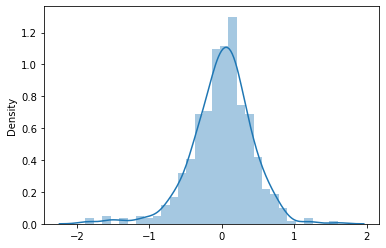

In [1929]:
#Residual analysis of train set
y_train_pred = lm.predict(X_train_lm)
residuals=y_train-y_train_pred
sns.distplot(residuals)

In [1930]:
#Making predictions
bike_data_test.describe()


,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4,yr_1,...,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.094304,0.092790,-0.084140,-0.044745,0.318182,0.027273,0.263636,0.245455,0.236364,0.481818,...,0.072727,0.086364,0.036364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.700000
std,1.033465,1.024502,1.020528,0.940739,0.466833,0.163248,0.441609,0.431338,0.425817,0.500809,...,0.260281,0.281541,0.187620,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.459303
min,-2.175395,-2.295963,-2.666825,-2.143940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.806655,-0.793052,-0.832398,-0.719418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.091882,0.148424,-0.170826,-0.122362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.968557,0.943214,0.640461,0.482415,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.980997,2.204405,2.413579,2.868429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1931]:
X=X.drop('const',axis=1)

In [1932]:

X_test_new=X_test[X.columns]


In [1933]:
X_test_new=sm.add_constant(X_test_new)
y_pred=lm.predict(X_test_new)

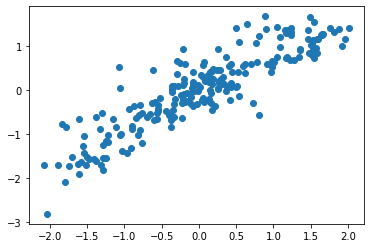

In [1934]:
fig=plt.figure()
plt.scatter(y_test,y_pred)

In [1935]:
#Final model

#cnt = -0.9058 + 0.5461*temp -0.3611*weathersit_2 -1.3408*weathersit_3 + 0.4308*season_2 + 0.6508*season_4 + 1.0327*yr_1 + 0.2483*mnth_8 + 0.5315*mnth_9 + 0.2813*weekday_6 + 0.2484*workingday_1